In [1]:
import pandas as pd
from sklearn.manifold import TSNE
from bokeh.plotting import figure, show, output_file
from bokeh.models import HoverTool, ColumnDataSource


### Dimension Reduction with t-SNE

In [69]:
# Load the dataset
df = pd.read_csv('chem_space.csv')

df.head()

,SMILES,0,1,2,3,4,5,6,7,8,...,503,504,505,506,507,508,509,510,511,isDrug
0,CC(C1=C(CCN(C)C)Cc2ccccc21)c1ccccn1.O=C(O)C=CC...,-0.096161,-0.042178,-0.049701,-0.102553,0.022658,-0.049959,0.058890,-0.021739,-0.118109,...,-0.032741,0.011642,-0.007661,0.012535,-0.004168,-0.065090,-0.047995,-0.028318,0.009235,True
1,O=CCC(O)C(O)C(O)CO,-0.093915,-0.026993,-0.047740,-0.105974,0.021928,-0.057150,0.058673,-0.016488,-0.121891,...,-0.039128,0.015568,-0.020915,0.009466,-0.002106,-0.074081,-0.037635,-0.036164,0.020742,True
2,[C-]#[N+]CC(C)(C)OC.[C-]#[N+]CC(C)(C)OC.[C-]#[...,-0.090989,-0.026637,-0.045129,-0.102650,0.021508,-0.056404,0.057960,-0.016302,-0.117366,...,-0.038064,0.010632,-0.018290,0.008650,-0.001569,-0.072985,-0.038200,-0.034668,0.019741,True
3,Nc1nc(NC2CC2)c2ncn(C3C=CC(CO)C3)c2n1,-0.096449,-0.046576,-0.054333,-0.103825,0.018256,-0.048442,0.064073,-0.029742,-0.123369,...,-0.039792,0.013346,-0.005018,0.014695,-0.002353,-0.074146,-0.049464,-0.029570,0.005322,True
4,Cc1ccc(-c2ccc(C)cn2)nc1,-0.097703,-0.060559,-0.053756,-0.091710,0.019580,-0.045296,0.059982,-0.026656,-0.112734,...,-0.030498,0.004320,0.008813,0.017869,-0.004673,-0.056511,-0.056596,-0.023202,-0.001243,True


In [71]:
## function for dimension reduction depending on the model

def dimension_reduction(model, df, perplexity=10, n_iter=1000, metric='cosine', learning_rate=200, n_neighbors=15, min_dist=0.1):
    # Selecting columns '0' to '511'
    data = df.loc[:, '0':'511']
    
    # model : TSNE or UMAP or PCA
    if model == 'TSNE' :
        tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity, n_iter=n_iter, metric=metric, learning_rate=learning_rate)
        results = tsne.fit_transform(data)
    elif model == 'UMAP' :
        reducer = umap.UMAP(n_neighbors=n_neighbors, metric=metric, min_dist=min_dist, n_components=2, random_state=42)
        results = reducer.fit_transform(data)
    elif model == 'PCA' :
        # Standardizing the features (important for PCA)
        scaler = StandardScaler()
        data_scaled = scaler.fit_transform(data)
        # Applying PCA
        pca = PCA(n_components=2, random_state=42)  # n_components is the number of dimensions to reduce to
        results = pca.fit_transform(data_scaled)
    else :
        print('model should be TSNE or UMAP or PCA')
        return
    
    # Creating a new DataFrame with the reduced results
    reduced_df = pd.DataFrame(results, columns=['1', '2'])
   
    # Concatenating the t-SNE results with the original DataFrame's 'SMILES' column and 'isDrug' column
    reduced_df = pd.concat([reduced_df, df[['SMILES', 'isDrug']]], axis=1)
    reduced_df['isDrug_str'] = reduced_df['isDrug'].astype(str)
    reduced_df['image_url'] = ['images/' + str(idx) + '.png' for idx in reduced_df.index]
    
    # change 'isDrug' column to int for color mapping
    reduced_df['isDrug'] = [0 if isDrug == False else 1 for isDrug in reduced_df['isDrug']]
    reduced_df['color'] = reduced_df['isDrug'].map({1: 'red', 0: 'blue'})
    #%%
    return reduced_df

In [3]:
# Selecting columns '0' to '511'
data = df.loc[:, '0':'511']

# Applying t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=10, n_iter=1000, metric='cosine')
tsne_results = tsne.fit_transform(data)

# Creating a new DataFrame with the t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE-1', 'TSNE-2'])

In [4]:
tsne_df.head()

,TSNE-1,TSNE-2
0,12.088284,43.603214
1,-32.589558,81.279594
2,-35.610207,80.532944
3,1.264106,-16.858957
4,84.503372,24.832813


In [5]:
# Concatenating the t-SNE results with the original DataFrame's 'SMILES' column and 'isDrug' column
tsne_df = pd.concat([tsne_df, df[['SMILES', 'isDrug']]], axis=1)
tsne_df.head()

,TSNE-1,TSNE-2,SMILES,isDrug
0,12.088284,43.603214,CC(C1=C(CCN(C)C)Cc2ccccc21)c1ccccn1.O=C(O)C=CC...,True
1,-32.589558,81.279594,O=CCC(O)C(O)C(O)CO,True
2,-35.610207,80.532944,[C-]#[N+]CC(C)(C)OC.[C-]#[N+]CC(C)(C)OC.[C-]#[...,True
3,1.264106,-16.858957,Nc1nc(NC2CC2)c2ncn(C3C=CC(CO)C3)c2n1,True
4,84.503372,24.832813,Cc1ccc(-c2ccc(C)cn2)nc1,True


In [32]:
# Assuming tsne_df is your DataFrame with t-SNE results
# Convert 'isDrug' column to string for color mapping
tsne_df['isDrug_str'] = tsne_df['isDrug'].astype(str)
tsne_df['image_url'] = ['images/' + str(idx) + '.png' for idx in tsne_df.index]

# change 'isDrug' column to int for color mapping
tsne_df['isDrug'] = [0 if isDrug == False else 1 for isDrug in tsne_df['isDrug']]


In [43]:
tsne_df['color'] = tsne_df['isDrug'].map({1: 'red', 0: 'blue'})

In [25]:
tsne_df.to_csv('tsne.csv')

### Visualization

In [9]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from IPython.display import SVG

from rdkit import Chem
from rdkit.Chem import Draw

In [27]:
# Generating an image for a molecule

for idx, smiles in enumerate(tsne_df['SMILES']):
    mol = Chem.MolFromSmiles(smiles)
    img = Draw.MolToImage(mol)
    img.save(f"images/{idx}.png")

# # Save the image
# img_path = f"images_{smiles}.png"  # Ensure this path is correct for your setup
# img.save(img_path)

[21:23:04] WARNING: not removing hydrogen atom without neighbors
[21:23:04] WARNING: not removing hydrogen atom without neighbors
[21:23:04] WARNING: not removing hydrogen atom without neighbors


In [38]:
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, Circle, ColorBar
from bokeh.transform import linear_cmap
output_notebook()

Loading BokehJS ...

In [44]:
tsne_df.head()

,TSNE-1,TSNE-2,SMILES,isDrug,isDrug_str,image_url,color
0,12.088284,43.603214,CC(C1=C(CCN(C)C)Cc2ccccc21)c1ccccn1.O=C(O)C=CC...,1,True,images/0.png,red
1,-32.589558,81.279594,O=CCC(O)C(O)C(O)CO,1,True,images/1.png,red
2,-35.610207,80.532944,[C-]#[N+]CC(C)(C)OC.[C-]#[N+]CC(C)(C)OC.[C-]#[...,1,True,images/2.png,red
3,1.264106,-16.858957,Nc1nc(NC2CC2)c2ncn(C3C=CC(CO)C3)c2n1,1,True,images/3.png,red
4,84.503372,24.832813,Cc1ccc(-c2ccc(C)cn2)nc1,1,True,images/4.png,red


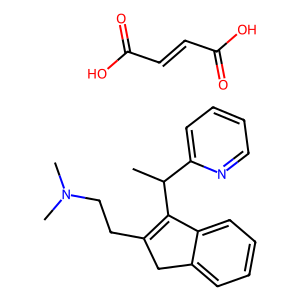

In [35]:
# show an example image tsne_df['image_url'][0]
from IPython.display import Image
Image("images/0.png")

In [47]:
def plot(df) :
    source = ColumnDataSource(data=dict(
        x=df['1'],
        y=df['2'],
        imgs=df['image_url'],  # URLs of the images
        #isDrug=tsne_df['isDrug_str'],
        color=df['color']
    ))
    
    # Create a figure
    p = figure(width=800, height=800, title="Visualization of Chemical Space",
               tools="pan,wheel_zoom,box_zoom,reset", active_scroll='wheel_zoom')
    
    # Add a hover tool to display images
    hover = HoverTool(
        tooltips="""
        <div>
            <div>
                <img
                    src="@imgs" height="150" alt="@imgs" width="150"
                    style="float: left; margin: 0px 15px 15px 0px;"
                    border="2"
                ></img>
            </div>
        </div>
        """
    )
    
    p.add_tools(hover)
    
    # Color mapping
    # color_mapper = linear_cmap(field_name='isDrug', palette=['blue', 'red'], low=0, high=1)
    
    # Plot the points
    p.circle('x', 'y', source=source, size=7, color='color', fill_alpha=0.6)
    
    # Show the plot
    show(p)

In [64]:
#change column name
tsne_df.columns = ['1', '2', 'SMILES', 'isDrug', 'isDrug_str', 'image_url', 'color']
plot(tsne_df)

### Tune parameters of tSNE

In [93]:
# change of perplexity 10 -> 20
tsne_df = dimension_reduction(model='TSNE', df=df, perplexity=20, n_iter=1000, metric='cosine', learning_rate=200, n_neighbors=15, min_dist=0.1)
plot(tsne_df)

In [89]:
tsne_df.to_csv('tsne_perplexity20.csv')

### UMAP

In [51]:
import umap

In [52]:
# Load the dataset
df = pd.read_csv('chem_space.csv')
df.head()

,SMILES,0,1,2,3,4,5,6,7,8,...,503,504,505,506,507,508,509,510,511,isDrug
0,CC(C1=C(CCN(C)C)Cc2ccccc21)c1ccccn1.O=C(O)C=CC...,-0.096161,-0.042178,-0.049701,-0.102553,0.022658,-0.049959,0.058890,-0.021739,-0.118109,...,-0.032741,0.011642,-0.007661,0.012535,-0.004168,-0.065090,-0.047995,-0.028318,0.009235,True
1,O=CCC(O)C(O)C(O)CO,-0.093915,-0.026993,-0.047740,-0.105974,0.021928,-0.057150,0.058673,-0.016488,-0.121891,...,-0.039128,0.015568,-0.020915,0.009466,-0.002106,-0.074081,-0.037635,-0.036164,0.020742,True
2,[C-]#[N+]CC(C)(C)OC.[C-]#[N+]CC(C)(C)OC.[C-]#[...,-0.090989,-0.026637,-0.045129,-0.102650,0.021508,-0.056404,0.057960,-0.016302,-0.117366,...,-0.038064,0.010632,-0.018290,0.008650,-0.001569,-0.072985,-0.038200,-0.034668,0.019741,True
3,Nc1nc(NC2CC2)c2ncn(C3C=CC(CO)C3)c2n1,-0.096449,-0.046576,-0.054333,-0.103825,0.018256,-0.048442,0.064073,-0.029742,-0.123369,...,-0.039792,0.013346,-0.005018,0.014695,-0.002353,-0.074146,-0.049464,-0.029570,0.005322,True
4,Cc1ccc(-c2ccc(C)cn2)nc1,-0.097703,-0.060559,-0.053756,-0.091710,0.019580,-0.045296,0.059982,-0.026656,-0.112734,...,-0.030498,0.004320,0.008813,0.017869,-0.004673,-0.056511,-0.056596,-0.023202,-0.001243,True


In [53]:
# Selecting columns '0' to '511'
data = df.loc[:, '0':'511']

# Fit and transform with UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embedding = reducer.fit_transform(data)

# Convert the results to a DataFrame
umap_df = pd.DataFrame(embedding, columns=['1', '2'])

/Users/j/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [54]:
umap_df.head()

,1,2
0,8.508199,2.898161
1,-3.646937,5.243036
2,-3.608001,5.261474
3,11.847430,7.111656
4,11.082559,-4.587137


In [55]:
# Concatenating the umap results with the original DataFrame's 'SMILES' column and 'isDrug' column
umap_df = pd.concat([umap_df, df[['SMILES', 'isDrug']]], axis=1)

umap_df['isDrug_str'] = umap_df['isDrug'].astype(str)
umap_df['image_url'] = ['images/' + str(idx) + '.png' for idx in umap_df.index]

# change 'isDrug' column to int for color mapping
umap_df['isDrug'] = [0 if isDrug == False else 1 for isDrug in umap_df['isDrug']]
umap_df['color'] = umap_df['isDrug'].map({1: 'red', 0: 'blue'})

umap_df.head()

,1,2,SMILES,isDrug,isDrug_str,image_url,color
0,8.508199,2.898161,CC(C1=C(CCN(C)C)Cc2ccccc21)c1ccccn1.O=C(O)C=CC...,1,True,images/0.png,red
1,-3.646937,5.243036,O=CCC(O)C(O)C(O)CO,1,True,images/1.png,red
2,-3.608001,5.261474,[C-]#[N+]CC(C)(C)OC.[C-]#[N+]CC(C)(C)OC.[C-]#[...,1,True,images/2.png,red
3,11.847430,7.111656,Nc1nc(NC2CC2)c2ncn(C3C=CC(CO)C3)c2n1,1,True,images/3.png,red
4,11.082559,-4.587137,Cc1ccc(-c2ccc(C)cn2)nc1,1,True,images/4.png,red


In [57]:
umap_df.to_csv('umap.csv')

In [61]:
plot(umap_df)

In [88]:
umap_df = dimension_reduction(model='UMAP', df=df, perplexity=10, n_iter=1000, metric='cosine', learning_rate=200, n_neighbors=12, min_dist=0.7)
plot(umap_df)

/Users/j/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


### PCA

In [56]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [58]:
df = pd.read_csv('chem_space.csv')

# Selecting the feature columns (assuming they are named '0' to '511')
X = df.loc[:, '0':'511']  # Adjust column names as per your dataset

# Standardizing the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA
pca = PCA(n_components=2)  # n_components is the number of dimensions to reduce to
principal_components = pca.fit_transform(X_scaled)

# Creating a new DataFrame with the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['1', '2'])

In [59]:
# Concatenating the PCA results with the original DataFrame's 'SMILES' column and 'isDrug' column
pca_df = pd.concat([pca_df, df[['SMILES', 'isDrug']]], axis=1)

pca_df['isDrug_str'] = pca_df['isDrug'].astype(str)
pca_df['image_url'] = ['images/' + str(idx) + '.png' for idx in pca_df.index]

# change 'isDrug' column to int for color mapping
pca_df['isDrug'] = [0 if isDrug == False else 1 for isDrug in pca_df['isDrug']]
pca_df['color'] = pca_df['isDrug'].map({1: 'red', 0: 'blue'})

pca_df.head()

,1,2,SMILES,isDrug,isDrug_str,image_url,color
0,3.622529,7.412016,CC(C1=C(CCN(C)C)Cc2ccccc21)c1ccccn1.O=C(O)C=CC...,1,True,images/0.png,red
1,-23.563426,17.647232,O=CCC(O)C(O)C(O)CO,1,True,images/1.png,red
2,-20.614207,19.082097,[C-]#[N+]CC(C)(C)OC.[C-]#[N+]CC(C)(C)OC.[C-]#[...,1,True,images/2.png,red
3,2.801111,-11.402635,Nc1nc(NC2CC2)c2ncn(C3C=CC(CO)C3)c2n1,1,True,images/3.png,red
4,34.508651,-2.507224,Cc1ccc(-c2ccc(C)cn2)nc1,1,True,images/4.png,red


In [60]:
pca_df.to_csv('pca.csv')

In [62]:
plot(pca_df)

### Baseline plotting

In [65]:
baseline_df = pd.read_csv('chem_space_baseline_BBB.csv')
baseline_df.head()

,SMILES,0,1,2,3,4,5,6,7,8,...,55,56,57,58,59,60,61,62,63,isDrug
0,CC(C1=C(CCN(C)C)Cc2ccccc21)c1ccccn1.O=C(O)C=CC...,0.166752,0.030827,-0.101763,-0.090764,-0.157055,-0.080508,-0.550249,-0.116989,0.185632,...,-0.159431,-0.611508,0.138733,0.134708,-0.034625,-0.218111,-0.378448,0.737199,-0.341427,True
1,O=CCC(O)C(O)C(O)CO,0.171794,0.122293,-0.582693,-0.254272,0.118005,-0.021506,-0.172880,0.298095,0.018189,...,-0.114900,-0.271954,-0.322190,-0.159567,0.581381,-0.287551,0.279872,0.421954,0.741849,True
2,[C-]#[N+]CC(C)(C)OC.[C-]#[N+]CC(C)(C)OC.[C-]#[...,0.164140,-0.004478,-0.048213,-0.160428,-0.104158,0.036850,-0.648202,0.601434,0.496331,...,-0.246975,-0.442404,0.142147,0.044529,-0.380872,-0.577898,0.137099,0.561551,-0.015546,True
3,Nc1nc(NC2CC2)c2ncn(C3C=CC(CO)C3)c2n1,0.026724,-0.074271,-0.118615,-0.359205,0.020685,-0.215722,-0.224597,-0.034480,0.514009,...,0.035339,-0.073508,0.318724,0.402943,0.097356,-0.471572,-0.426698,0.605657,-0.224073,True
4,Cc1ccc(-c2ccc(C)cn2)nc1,0.081016,-0.135995,0.104254,0.070400,0.443763,0.004890,-0.111484,-0.134222,-0.177757,...,-0.103914,-0.581236,-0.470140,0.644990,0.153585,-0.089428,-0.626787,0.317429,-0.027293,True


In [66]:
# Selecting columns '0' to '63'
data = baseline_df.loc[:, '0':'63']

# Applying t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=10, n_iter=1000, metric='cosine')
tsne_results = tsne.fit_transform(data)

# Creating a new DataFrame with the t-SNE results
base_tsne_df = pd.DataFrame(tsne_results, columns=['1', '2'])

# Concatenating the t-SNE results with the original DataFrame's 'SMILES' column and 'isDrug' column
base_tsne_df = pd.concat([base_tsne_df, baseline_df[['SMILES', 'isDrug']]], axis=1)

base_tsne_df['isDrug_str'] = base_tsne_df['isDrug'].astype(str)
base_tsne_df['image_url'] = ['images/' + str(idx) + '.png' for idx in base_tsne_df.index]

# change 'isDrug' column to int for color mapping
base_tsne_df['isDrug'] = [0 if isDrug == False else 1 for isDrug in base_tsne_df['isDrug']]

base_tsne_df.head()

,1,2,SMILES,isDrug,isDrug_str,image_url
0,-47.877605,-55.003231,CC(C1=C(CCN(C)C)Cc2ccccc21)c1ccccn1.O=C(O)C=CC...,1,True,images/0.png
1,30.630625,-20.775419,O=CCC(O)C(O)C(O)CO,1,True,images/1.png
2,-57.293007,8.748216,[C-]#[N+]CC(C)(C)OC.[C-]#[N+]CC(C)(C)OC.[C-]#[...,1,True,images/2.png
3,-35.171005,16.169439,Nc1nc(NC2CC2)c2ncn(C3C=CC(CO)C3)c2n1,1,True,images/3.png
4,8.301817,-40.597946,Cc1ccc(-c2ccc(C)cn2)nc1,1,True,images/4.png


In [67]:
base_tsne_df['color'] = base_tsne_df['isDrug'].map({1: 'red', 0: 'blue'})
base_tsne_df.head()

,1,2,SMILES,isDrug,isDrug_str,image_url,color
0,-47.877605,-55.003231,CC(C1=C(CCN(C)C)Cc2ccccc21)c1ccccn1.O=C(O)C=CC...,1,True,images/0.png,red
1,30.630625,-20.775419,O=CCC(O)C(O)C(O)CO,1,True,images/1.png,red
2,-57.293007,8.748216,[C-]#[N+]CC(C)(C)OC.[C-]#[N+]CC(C)(C)OC.[C-]#[...,1,True,images/2.png,red
3,-35.171005,16.169439,Nc1nc(NC2CC2)c2ncn(C3C=CC(CO)C3)c2n1,1,True,images/3.png,red
4,8.301817,-40.597946,Cc1ccc(-c2ccc(C)cn2)nc1,1,True,images/4.png,red


In [68]:
plot(base_tsne_df)

### Function for inferencing (docker)

In [105]:
# Assume that the LAST ELEMENT of 'df' is the instance we want to infer
def infer_dimension_reduction(model, df, perplexity=10, n_iter=1000, metric='cosine', learning_rate=200, n_neighbors=15,
                        min_dist=0.1):
    # Selecting columns '0' to '511'
    data = df.loc[:, '0':'511']

    # model : TSNE or UMAP or PCA
    if model == 'TSNE':
        tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity, n_iter=n_iter, metric=metric,
                    learning_rate=learning_rate)
        results = tsne.fit_transform(data)
    elif model == 'UMAP':
        reducer = umap.UMAP(n_neighbors=n_neighbors, metric=metric, min_dist=min_dist, n_components=2, random_state=42)
        results = reducer.fit_transform(data)
    elif model == 'PCA':
        # Standardizing the features (important for PCA)
        scaler = StandardScaler()
        data_scaled = scaler.fit_transform(data)
        # Applying PCA
        pca = PCA(n_components=2, random_state=42)  # n_components is the number of dimensions to reduce to
        results = pca.fit_transform(data_scaled)
    else:
        print('model should be TSNE or UMAP or PCA')
        return

    # Creating a new DataFrame with the reduced results
    reduced_df = pd.DataFrame(results, columns=['1', '2'])

    # Concatenating the t-SNE results with the original DataFrame's 'SMILES' column and 'isDrug' column
    reduced_df = pd.concat([reduced_df, df[['SMILES', 'isDrug']]], axis=1)
    reduced_df['isDrug_str'] = reduced_df['isDrug'].astype(str)
    reduced_df['image_url'] = ['images/' + str(idx) + '.png' for idx in reduced_df.index]

    # change 'isDrug' column to int for color mapping
    reduced_df['isDrug'] = [0 if isDrug == False else 1 for isDrug in reduced_df['isDrug']]
    reduced_df['color'] = reduced_df['isDrug'].map({1: 'red', 0: 'blue'})
    # change the color of the last element to green
    reduced_df['color'].iloc[-1] = 'lime'
    #%%
    return reduced_df

In [106]:
def infer_plot(df) :
    
    source = ColumnDataSource(data=dict(
        x=df[:-1]['1'],  # Exclude the last point for now
        y=df[:-1]['2'],
        imgs=df[:-1]['image_url'],
        color=df[:-1]['color']
    ))
    last_point_source = ColumnDataSource(data=dict(
        x=[df.iloc[-1]['1']],
        y=[df.iloc[-1]['2']],
        imgs=[df.iloc[-1]['image_url']],
        color=[df.iloc[-1]['color']]
    ))
    
    # Create a figure
    p = figure(width=800, height=800, title="Visualization of Chemical Space",
               tools="pan,wheel_zoom,box_zoom,reset", active_scroll='wheel_zoom')
    
    # Add a hover tool to display images
    hover = HoverTool(
        tooltips="""
        <div>
            <div>
                <img
                    src="@imgs" height="150" alt="@imgs" width="150"
                    style="float: left; margin: 0px 15px 15px 0px;"
                    border="2"
                ></img>
            </div>
        </div>
        """
    )
    
    p.add_tools(hover)
    
    # Color mapping
    # color_mapper = linear_cmap(field_name='isDrug', palette=['blue', 'red'], low=0, high=1)
    
    # Plot the points
    p.circle('x', 'y', source=source, size=7, color='color', fill_alpha=0.6)
    p.circle('x', 'y', source=last_point_source, size=20, color='color', fill_alpha=1)
    
    # Show the plot
    show(p)

In [107]:
tsne_df = infer_dimension_reduction(model='TSNE', df=df, perplexity=10, n_iter=1000, metric='cosine', learning_rate=200, n_neighbors=15, min_dist=0.1)
infer_plot(tsne_df)

/var/folders/zl/s9nqhgd10mv_xtxmg_vxp1hh0000gn/T/ipykernel_41366/3687660636.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_df['color'].iloc[-1] = 'lime'
